<a href="https://colab.research.google.com/github/00880218/Churn_pridiction_for_customer_data/blob/main/Mini__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the dataset
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head(20)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<Axes: xlabel='customer_id', ylabel='Count'>

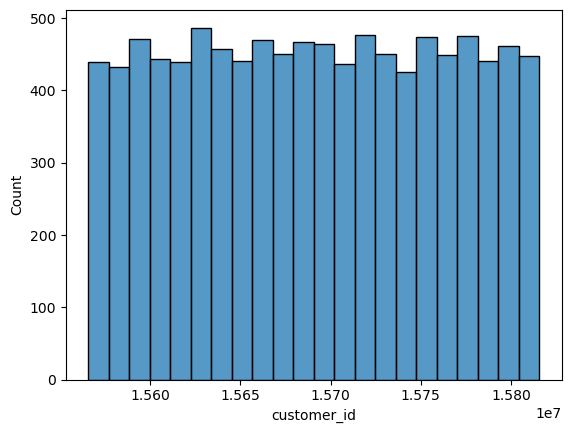

In [ ]:
import seaborn as sns
# Create a histogram for each column
sns.histplot(data=data, x='customer_id')

C:\Users\M Danish Raja\AppData\Local\Temp\ipykernel_10560\3413695219.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

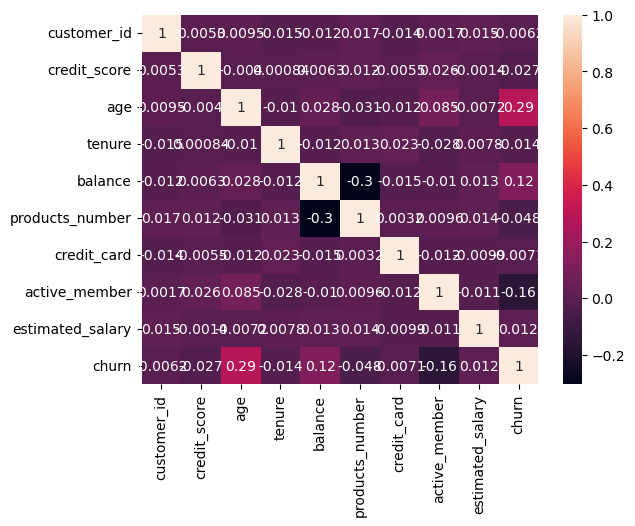

In [ ]:
# Create a heatmap of the correlation matrix
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='customer_id', ylabel='churn'>

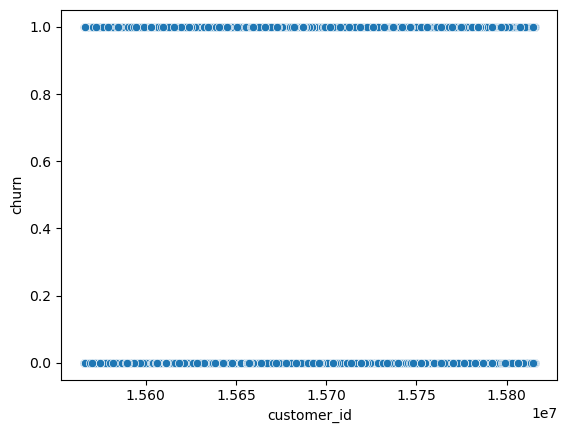

In [ ]:
# Create a scatter plot for two columns
sns.scatterplot(data=data, x='customer_id', y='churn')

In [ ]:
data.shape

(10000, 12)

In [ ]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
data.dtypes

In [ ]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Convert the column of float values to integer values
data['balance'] = data['balance'].astype(int)
data['estimated_salary'] = data['estimated_salary'].astype(int)
data.dtypes

customer_id          int64
credit_score         int64
country             object
gender              object
age                  int64
tenure               int64
balance              int32
products_number      int64
credit_card          int64
active_member        int64
estimated_salary     int32
churn                int64
dtype: object

In [ ]:
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0,1,1,1,101348,1
1,15647311,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,15619304,502,France,Female,42,8,159660,3,1,0,113931,1
3,15701354,699,France,Female,39,1,0,2,0,0,93826,0
4,15737888,850,Spain,Female,43,2,125510,1,1,1,79084,0
5,15574012,645,Spain,Male,44,8,113755,2,1,0,149756,1
6,15592531,822,France,Male,50,7,0,2,1,1,10062,0
7,15656148,376,Germany,Female,29,4,115046,4,1,0,119346,1
8,15792365,501,France,Male,44,4,142051,2,0,1,74940,0
9,15592389,684,France,Male,27,2,134603,1,1,1,71725,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'country' column
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])

# Encode the 'gender' column
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])


In [ ]:
data.dtypes

customer_id         int64
credit_score        int64
country             int32
gender              int32
age                 int64
tenure              int64
balance             int32
products_number     int64
credit_card         int64
active_member       int64
estimated_salary    int32
churn               int64
dtype: object

In [ ]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0,1,1,1,101348,1
1,15647311,608,2,0,41,1,83807,1,0,1,112542,0
2,15619304,502,0,0,42,8,159660,3,1,0,113931,1
3,15701354,699,0,0,39,1,0,2,0,0,93826,0
4,15737888,850,2,0,43,2,125510,1,1,1,79084,0


In [ ]:
# Preprocess the dataset
data = data.drop(['customer_id'], axis=1)
data['credit_score'] = pd.to_numeric(data['credit_score'])
data = data.dropna()
categorical_columns = ['age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
for column in categorical_columns:
    data[column] = LabelEncoder().fit_transform(data[column])

In [ ]:
# Split the dataset into training and testing sets
X = data.drop(['churn'], axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Train several machine learning models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))

C:\Users\M Danish Raja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.8075
Precision: 0.5735294117647058
Recall: 0.1925925925925926
F1 Score: 0.28835489833641403
Decision Tree
Accuracy: 0.7855
Precision: 0.4742489270386266
Recall: 0.5456790123456791
F1 Score: 0.5074626865671641
Random Forest
Accuracy: 0.8625
Precision: 0.7407407407407407
Recall: 0.49382716049382713
F1 Score: 0.5925925925925926
Support Vector Machine
Accuracy: 0.7975
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\M Danish Raja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\M Danish Raja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\M Danish Raja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


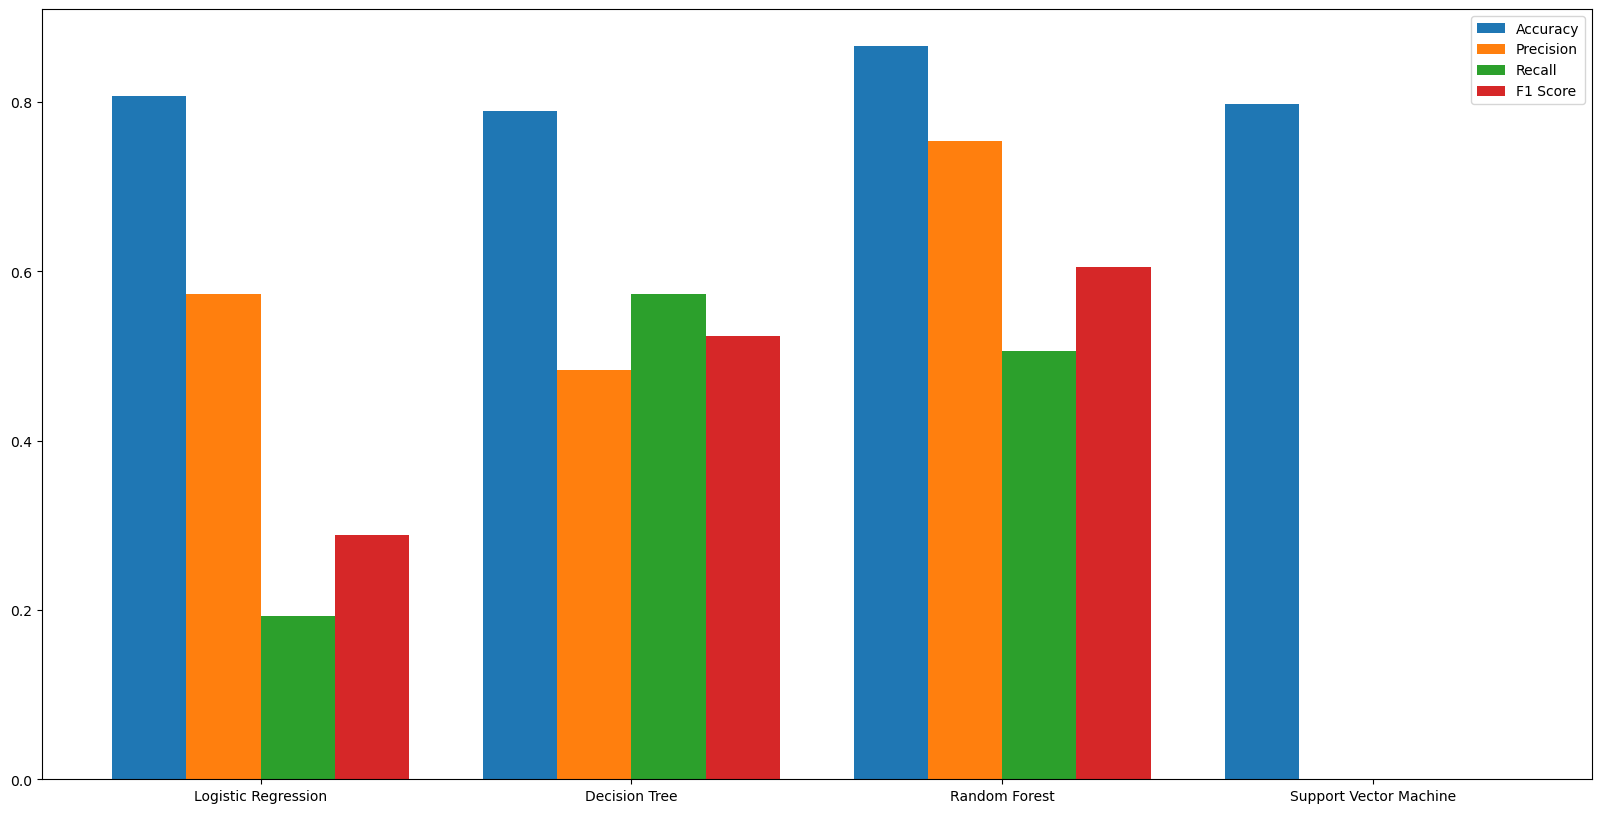

In [ ]:
# Initialize lists to store the performance metrics
names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Evaluate the performance of each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
# Create a figure with the specified size
fig, ax = plt.subplots(figsize=(20,10))

# Create a bar chart to visualize the performance metrics
x = range(len(names))
width = 0.2
plt.bar([i - width*1.5 for i in x], accuracies, width, label='Accuracy')
plt.bar([i - width/2 for i in x], precisions, width, label='Precision')
plt.bar([i + width/2 for i in x], recalls, width, label='Recall')
plt.bar([i + width*1.5 for i in x], f1_scores, width, label='F1 Score')
plt.xticks(x, names)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the performance of each model
best_model = None
best_accuracy = 0
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Load the new dataset
new_data = load_new_data()

# Preprocess the new dataset
new_data = preprocess(new_data)

# Make predictions on the new dataset
y_pred = best_model.predict(new_data)
y_pred

NameError: name 'load_new_data' is not defined